In [ ]:
# Import Important Libraries
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing, linear_model # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_recall_fscore_support # 
import numpy as np
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import svm



In [ ]:
#Reading CSV File, Building_01, which is actually building_0000 
df = pd.read_csv('window_door_combine.csv', sep = '\t').drop("R",axis=1).drop("G",axis=1).drop("B",axis=1).drop("Point_Source_ID",axis=1)#, header=0, names = ['X','Y','Z','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification','Type'])
#df1 = df.dropna() 
#df2 = df1.values
df.info()
print(df.shape)
#print(df2[:, 14])
from sklearn.utils import resample 
df_majority = df[df.Type == 'door']
df_minority = df[df.Type == 'window'] 

#print(df_majority)
#downsampling majority class 

df_majority_downsampled = resample(df_majority, replace = False, n_samples = 12000, random_state=123)
#df_minority_downsampled = resample(df_minority, replace = False, n_samples = 12000, random_state=123)
df_minority_upsampled = resample(df_minority, replace = True, n_samples = 12000, random_state=123)
#df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_downsampled = pd.concat([df_majority_downsampled, df_minority_upsampled])

#display class counts 
df_downsampled.Type.value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22788 entries, 0 to 22787
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   //X                22788 non-null  float64
 1   Y                  22788 non-null  float64
 2   Z                  22788 non-null  float64
 3   Scan_Angle_Rank    22788 non-null  int64  
 4   Flightline_Edge    22788 non-null  int64  
 5   Scan_Direction     22788 non-null  int64  
 6   Number_of_Returns  22788 non-null  int64  
 7   Return_Number      22788 non-null  int64  
 8   Time               22788 non-null  float64
 9   Intensity          22788 non-null  int64  
 10  Classification     22788 non-null  int64  
 11  Type               22788 non-null  object 
dtypes: float64(4), int64(7), object(1)
memory usage: 2.1+ MB
(22788, 12)


door      12000
window    12000
Name: Type, dtype: int64

In [ ]:
#with downsampling, and normalization
xOld = df_downsampled.drop('Type', axis = 1)
#print(x)
y = df_downsampled.Type
#print(y)
#print(x.shape,y.shape)
#print(y.shape)

scaler = preprocessing.StandardScaler().fit(xOld)
scaler.mean_
scaler.scale_
x = scaler.transform(xOld)
#x= xOld
x.mean(axis = 0)
x.std(axis=0)

#print(x.shape)

array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.])

In [ ]:
#Train/Test Split
x_scaled = preprocessing.scale(x)
x_scaled = x
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, train_size = 0.75)

print(x_train)
#Making sure that 
y_train=y_train.astype('str')
y_test = y_test.astype('str')
print(x_train.shape, x_test.shape)
#print(y_train)

[[-0.98765143 -1.24329193 -1.09551706 ...  1.78117351 -0.29715181
  -1.27114272]
 [ 0.73866004  0.02811406 -0.51544041 ... -0.52507398  0.35164397
   0.78669372]
 [ 0.77957344 -0.04686187 -1.01186842 ... -0.52538744 -0.66009203
   0.78669372]
 ...
 [ 1.21067517 -1.11296655  0.53826814 ... -1.10044144  0.10754258
  -1.27114272]
 [-1.20119195  0.64813354 -0.42237194 ...  1.20893523 -0.64403272
   0.78669372]
 [-0.93412271  0.39787955 -0.77712486 ... -0.8003408   0.39339815
  -1.27114272]]
(18000, 11) (6000, 11)


In [ ]:
#Reading CSV File #2, Building_0000001 txt 
df_a =  pd.read_csv('building07_test.csv',sep = '\t').drop("R",axis=1).drop("G",axis=1).drop("B",axis=1).drop("Point_Source_ID",axis=1)#,header = 0,names = ['X','Y','Z','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification','Type'])
df_a1 = df_a.dropna() 
df_a2 = df_a1.values
#print(df_a)
#df_a.info()
print(df_a.Type.value_counts())
#print(df_a['Z'])
'''
#Reading CSV File #2, Building_0000001 txt 
df_b = pd.read_csv('Buildings_000002.txt',sep = ' ')
df_b1 = df_b.dropna() 
df_b2 = df_b1.values
'''

window    3262
door      2369
Name: Type, dtype: int64


"\n#Reading CSV File #2, Building_0000001 txt \ndf_b = pd.read_csv('Buildings_000002.txt',sep = ' ')\ndf_b1 = df_b.dropna() \ndf_b2 = df_b1.values\n"

In [ ]:
#Normalizing two other data sets
#For building 000001
x1Old = df_a2[:, :11] 
y1 = df_a2[:, 11] 

scaler = preprocessing.StandardScaler().fit(x1Old)
x1 = scaler.transform(x1Old)
x1 = x1Old

print(x1)
'''
#For building 000002
x2Old = df_b2[:, :14] 
y2 = df_b2[:, 14] 

scaler = preprocessing.StandardScaler().fit(x2Old)
x2 = scaler.transform(x2Old)
'''

[[315557.1429 234783.0562 7.01499987 ... 393042.2812 7 4]
 [315558.442 234784.6689 5.24800014 ... 394855.678 59 4]
 [315557.386 234783.9551 5.21299982 ... 394855.7439 74 4]
 ...
 [315555.418 234791.6201 10.08399963 ... 394536.4787 10 4]
 [315555.5341 234791.6611 10.0909996 ... 394536.4695 72 4]
 [315555.776 234791.7441 11.30000019 ... 394536.4507 88 4]]


'\n#For building 000002\nx2Old = df_b2[:, :14] \ny2 = df_b2[:, 14] \n\nscaler = preprocessing.StandardScaler().fit(x2Old)\nx2 = scaler.transform(x2Old)\n'

In [ ]:
#Logistic Regression 
logreg = LogisticRegression(C=1).fit(x_train,y_train)
yhat_train = logreg.predict(x_train)
print(np.unique(yhat_train))
accuracy_train = accuracy_score(y_train, yhat_train)
print("Accuracy for Train Data:",accuracy_train)

yhat_test = logreg.predict(x_test)
accuracy_test = accuracy_score(y_test, yhat_test)
print("Accuracy for Test Data:",accuracy_test)

['door' 'window']
Accuracy for Train Data: 0.9133888888888889
Accuracy for Test Data: 0.908


In [ ]:
yhat_building02 = logreg.predict(x1)
print(np.unique(yhat_building02))
accuracy_b02 = accuracy_score(y1, yhat_building02)
print("Accuracy for Train Data:",accuracy_b02)

['door']
Accuracy for Train Data: 0.4207068016338128


In [ ]:
#Model Parameters (w/o Regularization)
w = logreg.coef_ 
intercept = logreg.intercept_

precision, recall ,fscore,_ = precision_recall_fscore_support(y_train,yhat_train,average='binary',pos_label='door')
print("Coefficient:",w)
print("Intercept:",intercept)
print("Precision:",precision)
print("Recall:",recall)
print("Fscore:",fscore)


Coefficient: [[ 0.011335   -0.31659978  3.13438527 -0.27314706 -0.04733458  0.
  -0.06495826  0.14919494  0.01786053  0.43967635  0.90856486]]
Intercept: [0.54825024]
Precision: 0.8783838795033584
Recall: 0.9595330739299611
Fscore: 0.917166994314861


In [ ]:
#Added regularization
cVals = [0.001, 0.01, 0.1, 1, 10, 100]
acc_train_ridge = []
acc_test_ridge = []
fscore_test_ridge = []
for c in cVals:
    # Creating Logistic Regression model object with 'l2' regularization
    logreg_l2 = linear_model.LogisticRegression(C = c)

    # Fitting model on training set
    logreg_l2.fit(x_train,y_train)

    # Finding prediction on training set
    yhat_train_l2 = logreg_l2.predict(x1)

    # Finding training accuracy
    acc_train_l2 = accuracy_score(y1, yhat_train_l2)
    acc_train_ridge.append(acc_train_l2)
    print("Accuracy on train data with ridge (Other building)= %f" % acc_train_l2)
    
    yhat_test_l2 = logreg_l2.predict(x_test)
    acc_test_l2 = accuracy_score(y_test, yhat_test_l2)
    print("Accuracy on train data with ridge = %f" % acc_test_l2)
    acc_test_ridge.append(acc_test_l2)

Accuracy on train data with ridge (Other building)= 0.420707
Accuracy on train data with ridge = 0.904000
Accuracy on train data with ridge (Other building)= 0.420707
Accuracy on train data with ridge = 0.905333
Accuracy on train data with ridge (Other building)= 0.420707
Accuracy on train data with ridge = 0.908167
Accuracy on train data with ridge (Other building)= 0.420707
Accuracy on train data with ridge = 0.908000
Accuracy on train data with ridge (Other building)= 0.420707
Accuracy on train data with ridge = 0.908000
Accuracy on train data with ridge (Other building)= 0.420707
Accuracy on train data with ridge = 0.908000


Confusion matrix, without normalization
[[2369    0]
 [3262    0]]
With Normalization
[[1. 0.]
 [1. 0.]]


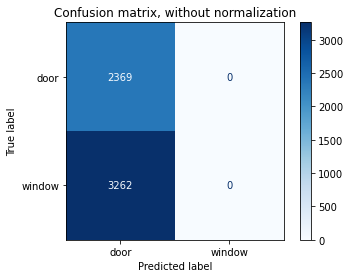

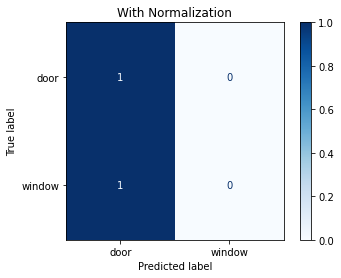

In [ ]:
#confusion matrices
np.set_printoptions(precision=2)
class_names = ['door','window']
classifier = linear_model.LogisticRegression(C=1).fit(x_train,y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("With Normalization", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x1, y1,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=22ec9222-3a33-4967-8b6b-eec8dcc0f029' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>